In [1]:
import math
import random

import gym
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Normal

from sac_openai_cuda import sac
import time

In [2]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib widget
# %matplotlib tk

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
# env_fn = lambda: gym.make("Pendulum-v0")
env_fn = lambda: gym.make('BipedalWalker-v2')
actor_net = sac(
    env_fn,
    steps_per_epoch=1000,
    epochs=100,
    use_logger=False,
    alpha=.3,
    device=device
)

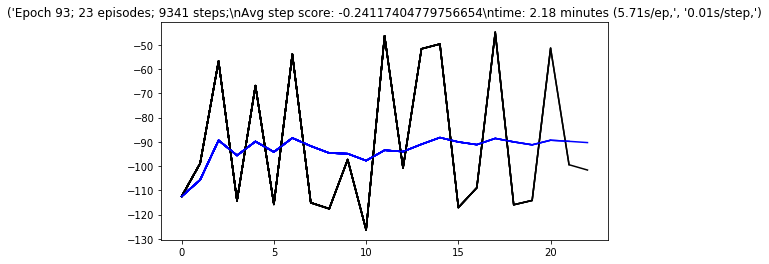

Epoch 94; 23 episodes; 9399 steps;	elapsed time: 2.20 minutes
Epoch 95; 23 episodes; 9499 steps;	elapsed time: 2.23 minutes
Epoch 96; 23 episodes; 9599 steps;	elapsed time: 2.25 minutes
Epoch 97; 23 episodes; 9699 steps;	elapsed time: 2.28 minutes
Epoch 98; 23 episodes; 9799 steps;	elapsed time: 2.30 minutes
Epoch 99; 23 episodes; 9899 steps;	elapsed time: 2.33 minutes
Epoch 100; 23 episodes; 9999 steps;	elapsed time: 2.35 minutes


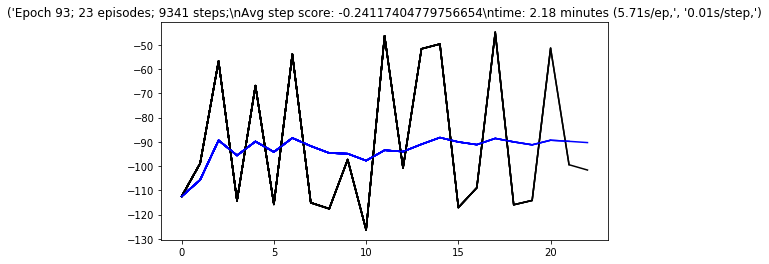

In [4]:
actor_net = sac(
    env_fn,
    steps_per_epoch=1000,
    epochs=100,
    use_logger=False,
    alpha=.3,
    device="cpu"
)

In [4]:
env = gym.make("BipedalWalker-v2")
for i in range(10):
    print(i)
    state = env.reset()
    while True:
        # action = agent.act(state)
        env.render()
        action = actor_net.act(
            torch.as_tensor(state, dtype=torch.float32), deterministic=True
        )
        # action = policy_net.get_action(state)
        next_state, reward, done, _ = env.step(action)
        state = next_state
        if done:
            break

env.close()

In [18]:
order = 10**np.floor(np.log10(a))
((a // order)+1)*order

array([2.e+01, 3.e+01, 4.e+01, 6.e+01, 9.e+01, 2.e+02, 2.e+02, 3.e+02,
       5.e+02, 7.e+02, 1.e+03, 2.e+03, 3.e+03, 4.e+03, 5.e+03, 8.e+03,
       2.e+04, 2.e+04, 3.e+04, 4.e+04])

Epoch 4    45 episodes    345 steps; 
Avg step score: 343 
time: 6453 sec (0.34s/ep, 0.0035s/step,


'Epoch 4    45 episodes    345 steps; \nAvg step score: 343 \ntime: 6453 sec (0.34s/ep, 0.0035s/step,'

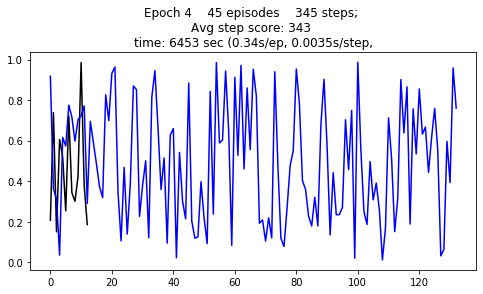

In [12]:
f, ax = plt.subplots(figsize=(8, 4))

plot_title = (
                    f"Epoch {4};    {45} episodes    {345} steps;"
                    f" \nAvg step score: {343}"
                    f" \ntime: {6453} sec"
                    f" ({.34}s/ep,"
                    f" {.003453:.4f}s/step,"
                )

ax.set_title(plot_title)
ax.plot(np.random.rand(13), "k")
ax.plot(np.random.rand(133), "b")
# display.clear_output(wait=True)
# display.display(f)
print(plot_title)
plot_title